<a href="https://colab.research.google.com/github/imsoumya18/machine_learning/blob/main/Classification_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml("mnist_784", as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [4]:
X, y = mnist.data, mnist.target

In [5]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
X.shape

(70000, 784)

In [7]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [8]:
y.shape

(70000,)

In [9]:
import matplotlib.pyplot as plt

In [10]:
def plot_digit(image_data):
  image = image_data.reshape(28, 28)
  plt.imshow(image, cmap="binary")
  plt.axis("off")

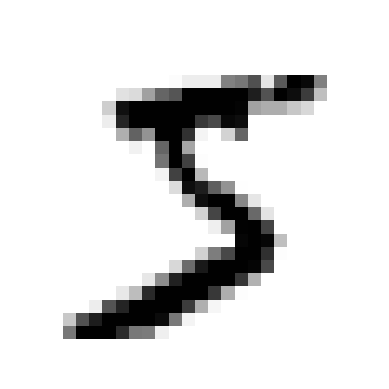

In [11]:
some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [12]:
y[0]

'5'

In [13]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [14]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [15]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [16]:
y_test_5

array([False, False, False, ..., False,  True, False])

In [17]:
from sklearn.linear_model import SGDClassifier

In [18]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [19]:
sgd_clf.predict([some_digit])

array([ True])

In [20]:
from sklearn.model_selection import cross_val_score

In [21]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [22]:
from sklearn.dummy import DummyClassifier

In [23]:
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))

False


In [24]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

In [25]:
from sklearn.model_selection import cross_val_predict

In [26]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [27]:
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
cm = confusion_matrix(y_train_5, y_train_pred)

In [30]:
cm

array([[53892,   687],
       [ 1891,  3530]])

In [31]:
y_train_perfect_predictions = y_train_5

In [32]:
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

In [33]:
from sklearn.metrics import precision_score, recall_score

In [34]:
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [35]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [36]:
from sklearn.metrics import f1_score

In [37]:
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [38]:
y_scores = sgd_clf.decision_function([some_digit])

In [39]:
y_scores

array([2164.22030239])

In [40]:
threshold = 0

In [41]:
y_some_digit_pred = (y_scores > threshold)

In [42]:
y_some_digit_pred

array([ True])

In [43]:
threshold = 3000

In [44]:
y_some_digit_pred = (y_scores > threshold)

In [45]:
y_some_digit_pred

array([False])

In [46]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [47]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

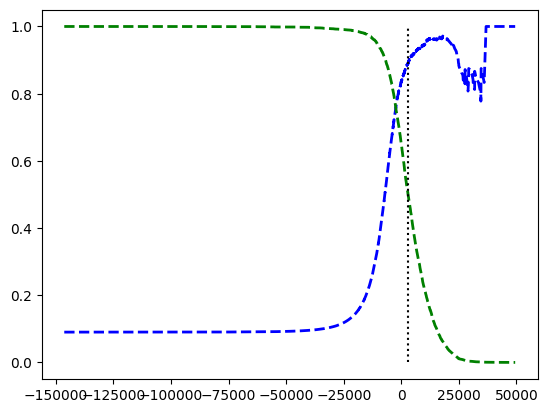

In [48]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g--", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

plt.show()

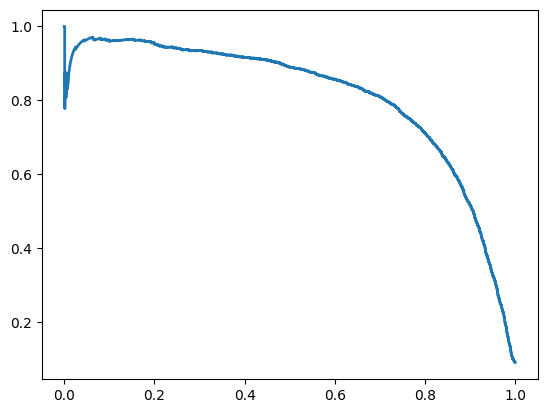

In [49]:
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall Curve")
plt.show()

In [50]:
idx_for_90_precision = (precisions >= 0.9).argmax()

In [51]:
threshold_for_90_precision = thresholds[idx_for_90_precision]

In [52]:
threshold_for_90_precision

3370.0194991439557

In [53]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)

In [54]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [55]:
recall_at_90_precision = recall_score(y_train_5, y_train_pred_90)

In [56]:
recall_at_90_precision

0.4799852425751706

In [57]:
from sklearn.metrics import roc_curve

In [58]:
fpr, tpr, threshold = roc_curve(y_train_5, y_scores)

In [59]:
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

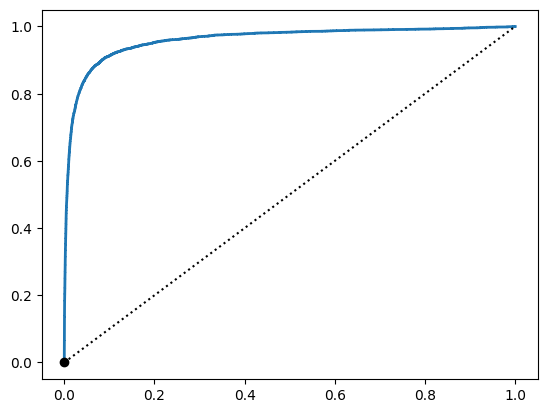

In [60]:
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], "k:", label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")

plt.show()

In [61]:
from sklearn.metrics import roc_auc_score

In [62]:
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
forest_clf = RandomForestClassifier(random_state=42)

In [65]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [66]:
y_probas_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

In [67]:
y_scores_forest = y_probas_forest[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_5, y_scores_forest)

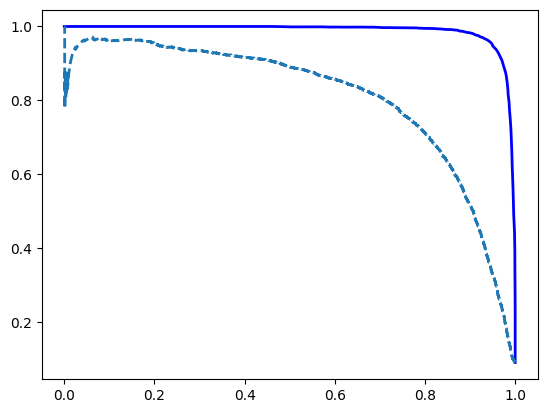

In [68]:
plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2, label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")

plt.show()

In [69]:
y_train_pred_forest = y_probas_forest[:, 1] >= 0.5

In [70]:
f1_score(y_train_5, y_train_pred_forest)

0.9274509803921569

In [71]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [72]:
from sklearn.svm import SVC

In [73]:
svm_clf = SVC(random_state=42)
svm_clf.fit(X_test[:2000], y_train[:2000])

SVC(random_state=42)

In [74]:
svm_clf.predict([some_digit])

array(['6'], dtype=object)

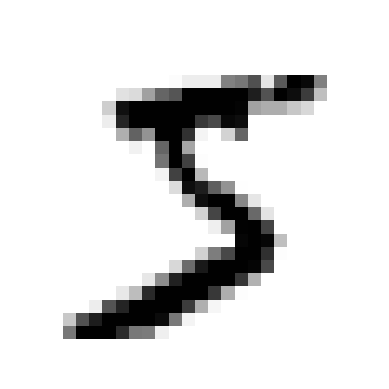

In [75]:
plot_digit(some_digit)
plt.show()

In [76]:
some_digit_scores = svm_clf.decision_function([some_digit])

In [77]:
some_digit_scores.round(2)

array([[ 5.19,  5.12,  1.78,  7.21,  5.14,  0.75,  9.28,  8.25, -0.29,
         2.79]])

In [78]:
class_id = some_digit_scores.argmax()

In [79]:
class_id

6

In [80]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [81]:
svm_clf.classes_[class_id]

'6'

In [82]:
from sklearn.multiclass import OneVsRestClassifier

In [83]:
ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [84]:
ovr_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [85]:
len(ovr_clf.estimators_)

10

In [86]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array(['3'], dtype='<U1')

In [87]:
sgd_clf.decision_function([some_digit]).round()

array([[-31893., -34420.,  -9531.,   1824., -22320.,  -1386., -26189.,
        -16148.,  -4604., -12051.]])

In [88]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [89]:
from sklearn.preprocessing import StandardScaler

In [90]:
scaler = StandardScaler()

In [91]:
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))

In [92]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])